## Entregable Exploracion de datos
- Estudiante: Emanuel Acevedo Muñoz

Importamos librerias requeridas

In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = '/content/BD_creditos (2).xlsx'
df = pd.read_excel(file_path)
df

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,4,2025-01-07 14:40:36,1852560.0,12,32,Empleado,3500000,1000000,128650,95.227787,...,0.0,0.0,NaN,NaN,0,0,0,916148.0,Creciente,1
1,4,2025-01-09 11:18:48,3181080.0,6,34,Empleado,5000000,2000000,441817,95.227787,...,0.0,0.0,NaN,NaN,0,0,0,4473774.0,Creciente,1
2,9,2024-12-26 18:52:57,670200.0,5,34,Independiente,5000000,2000000,108632,95.227787,...,0.0,274561.0,274561.0,NaN,2,0,1,NaN,NaN,1
3,9,2024-12-04 14:20:50,506806.8,2,25,Independiente,3000000,900000,199684,95.227787,...,0.0,27564.0,27564.0,NaN,1,0,6,NaN,NaN,1
4,4,2025-04-30 18:41:57,999780.0,10,26,Empleado,2000000,600000,92509,95.227787,...,0.0,0.0,NaN,NaN,0,0,0,61000.0,Creciente,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,9,2024-12-18 09:32:36,1269000.0,8,38,Independiente,4000000,1000000,131953,95.227787,...,0.0,3727.0,1015.0,0.0,0,0,6,NaN,NaN,1
10759,9,2025-01-16 10:57:01,640880.4,9,56,Independiente,4500000,2000000,59853,95.227787,...,0.0,14578.0,8817.0,0.0,2,0,6,NaN,NaN,1
10760,9,2025-04-19 14:41:28,586680.0,5,44,Independiente,5000000,2000000,95233,84.730786,...,0.0,3420.0,3112.0,0.0,3,0,6,NaN,NaN,1
10761,9,2024-12-06 15:15:07,1084186.8,5,66,Independiente,7000000,2000000,175581,95.227787,...,0.0,405767.0,138290.0,0.0,5,0,5,NaN,NaN,1


In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Columnas que tenemos en nuestro data set
- tipo_credito: Tipo de crédito otorgado al cliente.
- fecha_prestamo: Fecha en que se solicitó o concedió el préstamo.
- capital_prestado: Monto principal del préstamo en dinero.
- plazo_meses: Duración del préstamo en meses.
- edad_cliente: Edad del cliente en años.
- tipo_laboral: Tipo de situación laboral del cliente (ej. Empleado, Independiente).
- salario_cliente: Salario o ingresos mensuales del cliente.
- total_otros_prestamos: Monto total de otros préstamos que el cliente tiene actualmente.
- cuota_pactada: Valor de la cuota mensual acordada para el préstamo.
- puntaje: Puntaje interno de crédito del cliente.
- puntaje_datacredito: Puntaje de crédito del cliente según Datacrédito.
- cant_creditosvigentes: Cantidad de créditos vigentes que tiene el cliente.
- huella_consulta: Número de consultas de crédito realizadas sobre el cliente.
- saldo_mora: Saldo adeudado por mora en pagos anteriores.
- saldo_total: Saldo total adeudado por el cliente.
- saldo_principal: Saldo principal pendiente del préstamo.
- saldo_mora_codeudor: Saldo de mora atribuible al codeudor, si aplica.
- creditos_sectorFinanciero: Cantidad de créditos que el cliente tiene en el sector financiero.
- creditos_sectorCooperativo: Cantidad de créditos que el cliente tiene en el sector cooperativo.
- creditos_sectorReal: Cantidad de créditos que el cliente tiene en el sector real.
- promedio_ingresos_datacredito: Ingresos promedio del cliente según Datacrédito.
- tendencia_ingresos: Tendencia de los ingresos del cliente (ej. Creciente, Decreciente, Estable).
- Pago_atiempo: Indicador de si el cliente realiza los pagos a tiempo (0: No, 1: Sí).

In [5]:
df.head(20)

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,4,2025-01-07 14:40:36,1852560.0,12,32,Empleado,3500000,1000000,128650,95.227787,795.0,0,2,0.0,0.0,NaN,NaN,0,0,0,916148.0,Creciente,1
1,4,2025-01-09 11:18:48,3181080.0,6,34,Empleado,5000000,2000000,441817,95.227787,796.0,0,7,0.0,0.0,NaN,NaN,0,0,0,4473774.0,Creciente,1
2,9,2024-12-26 18:52:57,670200.0,5,34,Independiente,5000000,2000000,108632,95.227787,727.0,5,0,0.0,274561.0,274561.0,NaN,2,0,1,NaN,NaN,1
3,9,2024-12-04 14:20:50,506806.8,2,25,Independiente,3000000,900000,199684,95.227787,864.0,8,1,0.0,27564.0,27564.0,NaN,1,0,6,NaN,NaN,1
4,4,2025-04-30 18:41:57,999780.0,10,26,Empleado,2000000,600000,92509,95.227787,771.0,0,3,0.0,0.0,NaN,NaN,0,0,0,61000.0,Creciente,1
5,9,2024-11-30 11:38:41,465460.8,2,29,Independiente,3000000,1000000,183393,86.830187,678.0,7,2,0.0,4158.0,4158.0,NaN,0,0,4,NaN,NaN,1
6,9,2024-12-04 11:26:23,1084186.8,8,28,Independiente,3000000,1000000,112736,86.830187,665.0,2,1,0.0,6182.0,6182.0,NaN,1,0,0,NaN,NaN,1
7,4,2025-03-27 14:57:24,556680.0,6,30,Independiente,2000000,700000,82757,18.451409,738.0,0,4,0.0,0.0,NaN,NaN,0,0,0,955038.0,Creciente,0
8,9,2025-02-05 17:31:26,4627576.8,10,33,Independiente,2000000,800000,392490,47.613894,769.0,0,2,0.0,0.0,NaN,NaN,0,0,0,NaN,NaN,0
9,4,2024-12-15 11:23:46,2100000.0,8,26,Empleado,1200000,300000,237864,28.340846,785.0,0,1,0.0,0.0,NaN,NaN,0,0,0,1193037.0,Estable,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [7]:
# Análisis descriptivo del DataFrame:
df.describe(include='all')

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,10763,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,7831,10763.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN
top,NaN,NaN,NaN,NaN,NaN,Empleado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creciente,NaN
freq,NaN,NaN,NaN,NaN,NaN,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5294,NaN
mean,5.411131,2025-04-16 23:06:02.111121408,2.434315e+06,10.575583,43.948620,NaN,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,NaN,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,NaN,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,NaN,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,NaN,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,NaN,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,NaN,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,NaN,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,NaN,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,NaN,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,NaN,1.000000


Convertimos algunas columnas que fueron tomadas como numericas a categoricas

In [8]:
columns_to_convert_to_object = ['tipo_credito', 'Pago_atiempo']

for col in columns_to_convert_to_object:
    if col in df.columns:
        df[col] = df[col].astype('object')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  object        
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

Eliminamos columnas innecesarias para nuestro analisis

In [10]:
columnas_innecesarias = [
    'fecha_prestamo'
  ]

df.drop(columns=columnas_innecesarias, inplace=True)

In [11]:
df.columns

Index(['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente',
       'tipo_laboral', 'salario_cliente', 'total_otros_prestamos',
       'cuota_pactada', 'puntaje', 'puntaje_datacredito',
       'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total',
       'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero',
       'creditos_sectorCooperativo', 'creditos_sectorReal',
       'promedio_ingresos_datacredito', 'tendencia_ingresos', 'Pago_atiempo'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10763 non-null  object 
 1   capital_prestado               10763 non-null  float64
 2   plazo_meses                    10763 non-null  int64  
 3   edad_cliente                   10763 non-null  int64  
 4   tipo_laboral                   10763 non-null  object 
 5   salario_cliente                10763 non-null  int64  
 6   total_otros_prestamos          10763 non-null  int64  
 7   cuota_pactada                  10763 non-null  int64  
 8   puntaje                        10763 non-null  float64
 9   puntaje_datacredito            10757 non-null  float64
 10  cant_creditosvigentes          10763 non-null  int64  
 11  huella_consulta                10763 non-null  int64  
 12  saldo_mora                     10607 non-null 

Conteo de nulos por variable

In [13]:
df.isnull().sum().sort_values(ascending=False)

,0
tendencia_ingresos,2932
promedio_ingresos_datacredito,2930
saldo_mora_codeudor,590
saldo_principal,405
saldo_total,156
saldo_mora,156
puntaje_datacredito,6
tipo_laboral,0
salario_cliente,0
plazo_meses,0


Graficación del porcentaje de nulos

Text(0, 0.5, 'Porcentaje de Valores Nulos')

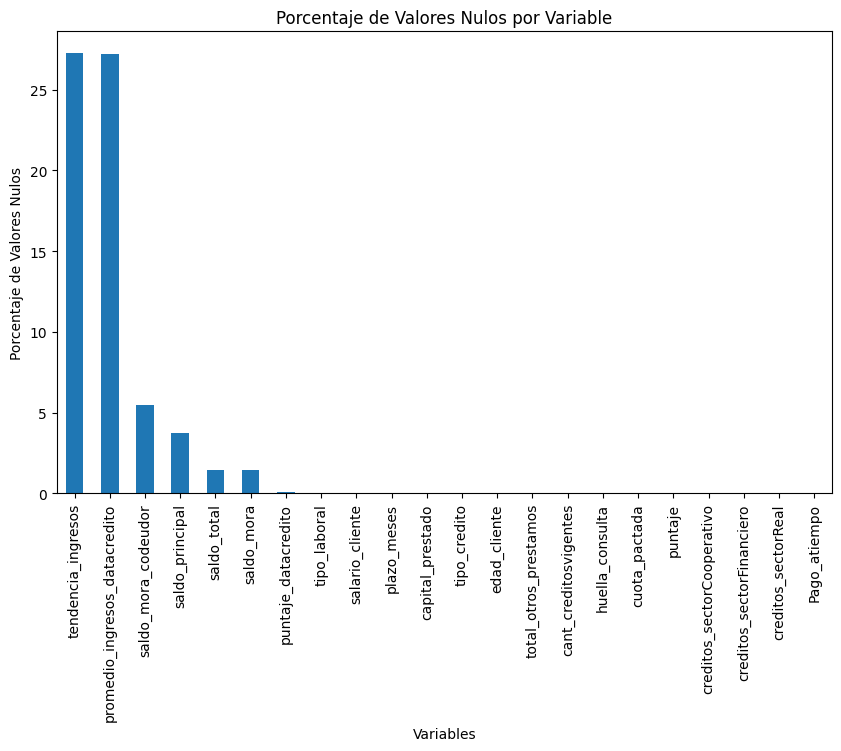

In [14]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de Valores Nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Nulos')

Encontramos que las variables tendencia_ingresos y promedio_ingresos_datacredito presentan un procentaje muy alto de nulos.

In [15]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tipo_credito,10763.0,6.0,4.0,7747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_prestado,10763.0,NaN,NaN,NaN,2434315.001319,1909642.758997,360000.0,1224831.0,1921920.0,3084840.0,41444152.8
plazo_meses,10763.0,NaN,NaN,NaN,10.575583,6.632082,2.0,6.0,10.0,12.0,90.0
edad_cliente,10763.0,NaN,NaN,NaN,43.94862,15.060877,19.0,33.0,42.0,53.0,123.0
tipo_laboral,10763,2,Empleado,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_cliente,10763.0,NaN,NaN,NaN,17216431.459909,355476717.60349,0.0,2000000.0,3000000.0,4875808.0,22000000000.0
total_otros_prestamos,10763.0,NaN,NaN,NaN,6238869.648518,118418316.941069,0.0,500000.0,1000000.0,2000000.0,6787675263.0
cuota_pactada,10763.0,NaN,NaN,NaN,243617.406671,210493.694608,23944.0,121041.5,182863.0,287833.5,3816752.0
puntaje,10763.0,NaN,NaN,NaN,91.170036,16.465441,-38.00999,95.227787,95.227787,95.227787,95.227787
puntaje_datacredito,10757.0,NaN,NaN,NaN,780.790834,104.878031,-7.0,757.0,791.0,825.0,999.0


Eliminamos las variables que presentan con un procentaje de nulos mayor a 15%

In [16]:
columnas_innecesarias = [
    'tendencia_ingresos',
    'promedio_ingresos_datacredito'
  ]

df.drop(columns=columnas_innecesarias, inplace=True)

Text(0, 0.5, 'Porcentaje de Valores Nulos')

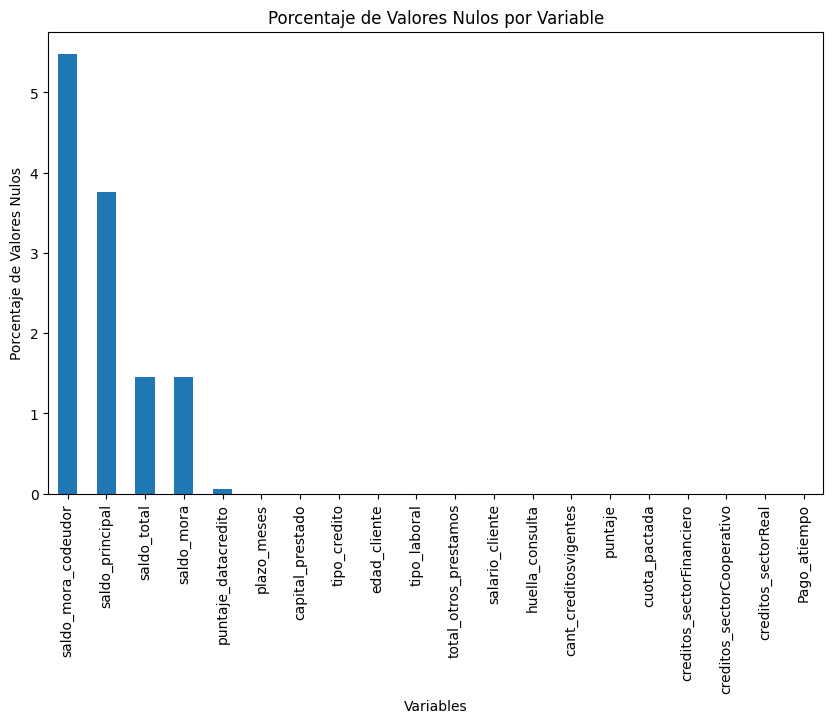

In [17]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de Valores Nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Nulos')

### Distribucion de variables numericas

In [ ]:
df.select_dtypes(include=np.number).hist(bins=30, figsize=(25,15))
plt.suptitle('Distribucion de variables numericas')
plt.show()

In [ ]:
df.info()

In [ ]:
# Boxplot para detectar outliers o datos atipicos
num_cols = ['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente',
            'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito',
            'cant_creditosvigentes', 'huella_consulta', 'saldo_mora',
            'saldo_total', 'saldo_principal', 'saldo_mora_codeudor','creditos_sectorFinanciero',
            'creditos_sectorCooperativo', 'creditos_sectorReal']
plt.figure(figsize=(25, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Tenemos varios hallasgos
- Encontramos que la cantidad de creditos vigentes tiene un registro que cuenta con 60 creditos vigentes.
- Contamos con un cliente con una edad de 120 aproximadamente
- Tenemos creditos que tienen un plazo mayor a 70 meses, estos creditos no hacen parte de lo que estamos buscando en nuestro dataset

In [ ]:
# Columnas y sus respectivos valores
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(f"Columna {col}")
  print(df[col].value_counts(dropna=False))

### Análisis de Desbalance

In [ ]:
df['Pago_atiempo'].value_counts(normalize=True) * 100

### Eliminacion de outliers

In [ ]:
# Edades negativas o absurdas
df['edad_cliente'] = df['edad_cliente'].apply(lambda x: x if (x is not None and 18 <= x <= 80) else np.nan)

# Encontramos que la cantidad de creditos vigentes tiene un registro que cuenta con 60 creditos vigentes.
df['cant_creditosvigentes'] = df['cant_creditosvigentes'].apply(lambda x: x if (x is not None and 0 <= x <= 50) else np.nan)

# Tenemos creditos que tienen un plazo mayor a 70 meses, estos creditos no hacen parte de lo que estamos buscando en nuestro dataset
df['plazo_meses'] = df['plazo_meses'].apply(lambda x: x if (x is not None and 0 <= x <= 70)  else np.nan)

In [ ]:
# Distribucion de variables numericas
df.select_dtypes(include=np.number).hist(bins=30, figsize=(25,15))
plt.suptitle('Distribucion de variables numericas')
plt.show()

### Imputacion de datos nulos

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de Valores Nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Nulos')

In [ ]:
columnas_numericas = ['saldo_mora_codeudor', 'saldo_principal', 'saldo_total', 'saldo_mora', 'edad_cliente', 'puntaje_datacredito', 'plazo_meses', 'cant_creditosvigentes']

df_numerico = df[columnas_numericas]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

imputer = KNNImputer(n_neighbors=5)
df_imputedo_scaled = imputer.fit_transform(df_scaled)

df_imputado = scaler.inverse_transform(df_imputedo_scaled)
df[columnas_numericas] = pd.DataFrame(df_imputado, columns=columnas_numericas)

In [ ]:
df['tipo_credito'].value_counts(dropna=False)

In [ ]:
df.info()

In [ ]:
df = df.astype({
    'edad_cliente': 'int',
    'salario_cliente': 'int',
})

In [ ]:
df.info()

### Atributos Derivados

In [ ]:
# 1. Relación Deuda-Ingreso: (total_otros_prestamos + capital_prestado) / salario_cliente
df['relacion_deuda_ingreso'] = np.where(
    df['salario_cliente'] > 0,
    (df['total_otros_prestamos'] + df['capital_prestado']) / df['salario_cliente'],
    0 # Manejar división por cero si el salario es 0
)

# 2. Carga de Pago Mensual: cuota_pactada / salario_cliente
df['carga_pago_mensual'] = np.where(
    df['salario_cliente'] > 0,
    df['cuota_pactada'] / df['salario_cliente'],
    0 # Manejar división por cero si el salario es 0
)

# 3. Ratio de Interés Total: ((cuota_pactada * plazo_meses) - capital_prestado) / capital_prestado
df['ratio_interes_total'] = np.where(
    df['capital_prestado'] > 0,
    ((df['cuota_pactada'] * df['plazo_meses']) - df['capital_prestado']) / df['capital_prestado'],
    0 # Manejar división por cero si el capital prestado es 0
)

# 4. Grupo de Edad
df['grupo_edad_cliente'] = pd.cut(df['edad_cliente'],
                                  bins=[17, 30, 45, 60, 80],
                                  labels=['18-30', '31-45', '46-60', '61-80'],
                                  right=False)

# 5. Cantidad de Créditos por Sector: suma de creditos_sectorFinanciero, creditos_sectorCooperativo, creditos_sectorReal
df['cant_creditos_por_sector'] = df['creditos_sectorFinanciero'] + df['creditos_sectorCooperativo'] + df['creditos_sectorReal']

df.head()

In [ ]:
df[df['ratio_interes_total'] > 0].count()

In [ ]:
df[df['ratio_interes_total'] < 0].count()

### Resumen del Dataset

El dataset `df` contiene **10763 filas** y **22 columnas**.

Los tipos de datos presentes en el DataFrame incluyen:
*   **Numéricos**: Se observan variables de tipo `int64` (enteros) y `float64` (decimales), que representan cantidades, edades, salarios, puntajes y saldos.
*   **Categóricos**: Se encuentran variables de tipo `object` que almacenan texto (como `tipo_credito`, `tipo_laboral`, `Pago_atiempo`, `grupo_edad_cliente`).

Este dataset ha sido preprocesado para manejar valores nulos y outliers en algunas de sus columnas numéricas, y se han generado nuevas características derivadas para enriquecer el análisis.

## Resumen de Limpieza y Preprocesamiento de Datos:

1.  **Conversión de Columnas a Tipo 'Object' (Categórico)**:
    *   Las columnas `tipo_credito` y `Pago_atiempo` fueron convertidas del tipo numérico a tipo 'object'.
    *   **Motivo**: Aunque `tipo_credito` contenía valores numéricos, representaban categorías de créditos y no tenían un significado numérico inherente. De manera similar, `Pago_atiempo` era un indicador binario (0 o 1) que se manejó mejor como una variable categórica para facilitar análisis cualitativos.

2.  **Eliminación de Columnas Innecesarias**:
    *   **`fecha_prestamo`**: Esta columna fue eliminada debido a que, para el propósito actual del análisis, la fecha exacta del préstamo no era una característica directamente relevante para la predicción del comportamiento de pago.
    *   **`tendencia_ingresos` y `promedio_ingresos_datacredito`**: Ambas columnas fueron eliminadas debido a que presentaban un porcentaje muy alto de valores nulos (aproximadamente el 27% de los datos). Dada la cantidad de datos faltantes, se decidió que su imputación podría introducir un sesgo significativo y se optó por removerlas para mantener la integridad del resto del dataset.

3.  **Imputación de Valores Nulos con KNNImputer**:
    *   Se identificaron valores nulos en columnas numéricas como `saldo_mora_codeudor`, `saldo_principal`, `saldo_total`, `saldo_mora`, `edad_cliente`, `puntaje_datacredito`, `plazo_meses` y `cant_creditosvigentes` después del tratamiento de outliers.
    *   **Estrategia**: Se utilizó `KNNImputer` (con `n_neighbors=5`) para imputar estos valores faltantes. Este método es efectivo ya que utiliza la información de los vecinos más cercanos para estimar los valores, manteniendo la estructura de los datos.
    *   **Proceso**: Las columnas numéricas con nulos fueron escaladas utilizando `StandardScaler` antes de la imputación para asegurar que todas las características contribuyeran igualmente a la distancia de los vecinos. Después de la imputación, los datos fueron transformados de nuevo a su escala original.

4.  **Tratamiento de Outliers**:
    *   **`edad_cliente`**: Se filtraron los valores atípicos, manteniendo solo las edades en un rango razonable (entre 18 y 80 años). Los valores fuera de este rango (como un cliente con 120 años) fueron reemplazados por `NaN` antes de la imputación.
    *   **`cant_creditosvigentes`**: Se identificó un registro con un número excesivo de créditos vigentes (60+). Se estableció un rango válido para esta columna (entre 0 y 60 créditos), reemplazando los valores fuera de este rango con `NaN`.
    *   **`plazo_meses`**: Se observaron créditos con plazos extremadamente largos (mayores a 70 meses) que no se ajustaban al contexto de los préstamos analizados. Se estableció un límite superior de 80 meses, y los plazos que lo excedían fueron convertidos a `NaN`.
    *   **Justificación**: Este tratamiento de outliers se realizó para eliminar datos que eran claramente erróneos o que representaban casos excepcionales que podrían distorsionar el análisis y los modelos predictivos.

## Atributos Derivados

A continuación, se explican las nuevas variables creadas y su relevancia para el análisis:

*   **relacion_deuda_ingreso**: Esta variable se calcula como la proporción de la deuda total del cliente (suma de `total_otros_prestamos` y `capital_prestado`) respecto a su `salario_cliente`. Representa una métrica clave del nivel de endeudamiento y la capacidad de pago del cliente, indicando la carga financiera general. Un valor alto podría sugerir un mayor riesgo de incumplimiento.

*   **carga_pago_mensual**: Se define como la relación entre la `cuota_pactada` mensual y el `salario_cliente`. Esta variable proporciona una visión directa del impacto inmediato del nuevo préstamo en el flujo de caja mensual del cliente, ayudando a evaluar la viabilidad de los pagos.

*   **ratio_interes_total**: Este atributo se calcula como el interés total pagado (derivado de `cuota_pactada` * `plazo_meses` menos `capital_prestado`) dividido por el `capital_prestado`. Indica el costo real del crédito en relación con el monto principal, lo cual es fundamental para entender la rentabilidad del préstamo para el prestamista y la carga de interés para el cliente.

*   **grupo_edad_cliente**: Es una variable categórica creada al segmentar la `edad_cliente` en rangos predefinidos: '18-30', '31-45', '46-60' y '61-80'. La creación de esta variable permite analizar patrones de comportamiento y riesgo asociados a diferentes grupos demográficos de edad, lo que puede ser útil para estrategias de marketing y evaluación de riesgo personalizadas.

*   **cant_creditos_por_sector**: Esta variable representa la suma de los créditos que el cliente tiene en los diferentes sectores: `creditos_sectorFinanciero`, `creditos_sectorCooperativo` y `creditos_sectorReal`. Ofrece una perspectiva integral de la actividad crediticia del cliente en todos los ámbitos, lo que puede influir en su capacidad de adquirir nuevos préstamos y su perfil de riesgo general.

## Hallazgos Clave del Análisis Univariado


*   **capital_prestado**: Muestra una distribución sesgada a la derecha, con la mayoría de los préstamos concentrados en montos más bajos y una cola larga hacia montos más altos. Esto es común en datos financieros y sugiere que hay menos préstamos de grandes cantidades.
*   **plazo_meses**: La distribución es claramente sesgada a la derecha, con un pico significativo en 12 meses y otros picos en 6 y 10 meses. Esto indica que la mayoría de los préstamos tienen plazos cortos a medianos. Se manejaron outliers que excedían los 80 meses.
*   **edad_cliente**: Presenta una distribución más cercana a la normal, aunque ligeramente sesgada a la derecha. La mayoría de los clientes se encuentran en un rango de edad productiva. Se eliminaron valores extremos (edades muy bajas o muy altas, como 120 años) y se imputaron los valores faltantes.
*   **salario_cliente**: Muestra un fuerte sesgo a la derecha, con la mayoría de los salarios en el rango bajo a medio, y algunos valores extremadamente altos que actúan como outliers significativos. La presencia de salarios cero indica posibles datos faltantes o clientes sin ingresos registrados.
*   **total_otros_prestamos**: Similar al salario, presenta un fuerte sesgo a la derecha, con la mayoría de los clientes teniendo pocos o ningún otro préstamo, y algunos con montos muy elevados.
*   **cuota_pactada**: Distribución sesgada a la derecha, lo cual es esperado dado que está correlacionada con el capital prestado.
*   **puntaje y puntaje_datacredito**: Ambas variables tienden a agruparse en valores altos, indicando que la mayoría de los clientes tienen buenos puntajes crediticios. `puntaje_datacredito` mostró algunos valores atípicos (negativos) que fueron tratados mediante imputación.
*   **cant_creditosvigentes, huella_consulta**: Estas variables están sesgadas a la derecha, con la mayoría de los clientes teniendo una cantidad baja de créditos o consultas, y algunos outliers con muchas operaciones.
*   **saldo_mora, saldo_total, saldo_principal, saldo_mora_codeudor**: Estas variables presentan una gran cantidad de ceros o valores muy bajos, indicando que la mayoría de los clientes no tienen mora o saldos pendientes, lo cual es positivo. Los valores no-cero se distribuyen con un sesgo a la derecha.
*   **creditos_sectorFinanciero, creditos_sectorCooperativo, creditos_sectorReal**: Todas estas variables están sesgadas a la derecha, con la mayoría de los clientes teniendo pocos o ningún crédito en estos sectores.

### Variables Categóricas

*   **tipo_credito**: El tipo de crédito '4' es, con diferencia, el más frecuente, seguido por el tipo '9'. Otros tipos de crédito son minoritarios, lo que podría indicar una especialización o mayor demanda en ciertos productos financieros.
*   **tipo_laboral**: La categoría 'Empleado' es significativamente más frecuente que 'Independiente', lo que podría influir en las políticas de riesgo o en el perfil del cliente promedio.
*   **Pago_atiempo**: La vasta mayoría de los clientes (aproximadamente el 95%) realiza sus pagos a tiempo (valor '1'). Esto indica un desequilibrio importante en la variable objetivo, lo cual es crucial para la modelización predictiva, ya que los eventos de "no pago a tiempo" son raros.

### Influencia en el Análisis Posterior

Estos hallazgos univariados son fundamentales para el análisis posterior:

*   **Tratamiento de Sesgos y Outliers**: La presencia de distribuciones sesgadas y numerosos outliers (especialmente en variables como `salario_cliente` y `total_otros_prestamos`) sugiere la necesidad de transformaciones de datos (e.g., logarítmicas) o el uso de modelos robustos que sean menos sensibles a estos extremos.
*   **Desbalance de Clases**: El fuerte desbalance en la variable `Pago_atiempo` requerirá técnicas de manejo de clases desbalanceadas (e.g., sobremuestreo, submuestreo, SMOTE) durante la fase de modelado para evitar que el modelo ignore la clase minoritaria.
*   **Análisis Categórico**: La preponderancia de ciertos `tipo_credito` y `tipo_laboral` indica que estos serán factores clave en cualquier segmentación de clientes o análisis de riesgo. El pequeño número de observaciones en algunas categorías de `tipo_credito` podría requerir agruparlas o tratarlas de forma especial para evitar problemas de escasez de datos.
*   **Imputación de Faltantes**: Las variables con valores faltantes imputados (como `edad_cliente`, `puntaje_datacredito`, `plazo_meses`, `cant_creditosvigentes` y los saldos) ahora están completas, lo que permite un análisis completo sin pérdida de observaciones, aunque se debe considerar el impacto potencial de la imputación en la variabilidad.

En resumen, el análisis univariado ha proporcionado una comprensión inicial de la calidad y distribución de los datos, guiando las próximas etapas de preprocesamiento y modelado.

# Analisis multivariable

## Matriz de Correlación de Características Numéricas

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de Características Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Diagramas de caja para comparar las distribuciones de 'capital_prestado' y 'salario_cliente' en diferentes categorías de 'tipo_laboral'.

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='tipo_laboral', y='capital_prestado', data=df)
plt.title('Distribución de Capital Prestado por Tipo Laboral')
plt.xlabel('Tipo Laboral')
plt.ylabel('Capital Prestado')

plt.subplot(1, 2, 2)
sns.boxplot(x='tipo_laboral', y='salario_cliente', data=df)
plt.title('Distribución de Salario Cliente por Tipo Laboral')
plt.xlabel('Tipo Laboral')
plt.ylabel('Salario Cliente')

plt.tight_layout()
plt.show()

Diagramas de caja para examinar la relación entre Pago_atiempo y varias variables numéricas clave: capital_prestado, edad_cliente, salario_cliente, puntaje y puntaje_datacredito. Esto permitirá comprender cómo varían estas características numéricas en función de si los pagos se realizan a tiempo.

In [ ]:
numerical_vars_for_pago_atiempo = ['capital_prestado', 'edad_cliente', 'salario_cliente', 'puntaje', 'puntaje_datacredito']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_vars_for_pago_atiempo, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Pago_atiempo', y=col, data=df)
    plt.title(f'Distribución de {col} por Pago a Tiempo')
    plt.xlabel('Pago a Tiempo (0: No, 1: Sí)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Para explorar la proporción de pagos puntuales ('Pago_atiempo') para cada 'tipo_crédito' y 'tipo_laboral', tenemos dos gráficos de barras apiladas.

In [ ]:
plt.figure(figsize=(15, 6))

# Proporción de Pago_atiempo por tipo_credito
plt.subplot(1, 2, 1)
pd.crosstab(df['tipo_credito'], df['Pago_atiempo'], normalize='index').plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.title('Proporción de Pago a Tiempo por Tipo de Crédito')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Proporción')
plt.legend(title='Pago a Tiempo', labels=['No', 'Sí'])

# Proporción de Pago_atiempo por tipo_laboral
plt.subplot(1, 2, 2)
pd.crosstab(df['tipo_laboral'], df['Pago_atiempo'], normalize='index').plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.title('Proporción de Pago a Tiempo por Tipo Laboral')
plt.xlabel('Tipo Laboral')
plt.ylabel('Proporción')
plt.legend(title='Pago a Tiempo', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

Gráfico de barras que muestra el 'capital_prestado' promedio para cada 'tipo_credito' único.

In [ ]:
avg_capital_by_tipo_credito = df.groupby('tipo_credito')['capital_prestado'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_capital_by_tipo_credito.plot(kind='bar', color='skyblue')
plt.title('Capital Promedio Prestado por Tipo de Crédito')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Capital Promedio Prestado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analizamos la influencia de las variables del historial crediticio en 'Pago_atiempo'

In [ ]:
credit_history_vars = [
    'cant_creditosvigentes',
    'creditos_sectorFinanciero',
    'creditos_sectorCooperativo',
    'creditos_sectorReal'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(credit_history_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Pago_atiempo', y=col, data=df)
    plt.title(f'Distribución de {col} por Pago a Tiempo')
    plt.xlabel('Pago a Tiempo (0: No, 1: Sí)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Resumen de Hallazgos Clave del Análisis Multivariado

Este análisis multivariado ha revelado varias relaciones y patrones importantes en los datos:

1.  **Matriz de Correlación de Características Numéricas**:
    *   Se observó una fuerte correlación positiva entre `capital_prestado` y `cuota_pactada`, lo cual es esperado ya que una mayor cantidad de capital prestado generalmente resulta en cuotas más altas.
    *   También se notó una correlación moderada entre `capital_prestado` y `plazo_meses`, indicando que préstamos más grandes pueden tener plazos más largos.
    *   La variable `puntaje_datacredito` mostró una correlación positiva con `puntaje`, sugiriendo que ambos puntajes reflejan aspectos similares de la solvencia del cliente.

2.  **Distribución de Capital Prestado y Salario Cliente por Tipo Laboral**:
    *   Los box plots mostraron que los clientes 'Empleado' tienden a tener un `capital_prestado` y `salario_cliente` más altos en comparación con los clientes 'Independiente', aunque con una mayor dispersión en los salarios para ambos grupos.
    *   Se identificaron numerosos valores atípicos en ambas distribuciones, especialmente en `salario_cliente`, lo que sugiere la presencia de clientes con ingresos excepcionalmente altos.

3.  **Relación entre 'Pago_atiempo' y Variables Numéricas Clave**:
    *   **Capital Prestado**: No se observa una diferencia significativa en el `capital_prestado` entre quienes pagan a tiempo y quienes no, aunque la mediana es ligeramente menor para los que no pagan a tiempo.
    *   **Edad del Cliente**: La `edad_cliente` parece ser similar en ambos grupos de `Pago_atiempo`.
    *   **Salario Cliente**: Los clientes que pagan a tiempo tienden a tener un `salario_cliente` mediano ligeramente más alto, aunque la presencia de outliers en ambos grupos dificulta una conclusión definitiva sin un análisis más profundo.
    *   **Puntaje y Puntaje Datacrédito**: Los clientes que pagan a tiempo muestran una mediana de `puntaje` y `puntaje_datacredito` más alta, lo que indica que un mejor historial crediticio y una mejor puntuación están asociados con un mayor cumplimiento en los pagos.

4.  **Proporción de Pago a Tiempo por Tipo de Crédito y Tipo Laboral**:
    *   **Tipo de Crédito**: La mayoría de los tipos de crédito muestran una alta proporción de pagos a tiempo. Algunos tipos de crédito (ej. tipo 68, 7, 10) tienen menos datos, pero en general, el comportamiento de pago a tiempo es dominante.
    *   **Tipo Laboral**: No se observaron diferencias sustanciales en la proporción de `Pago_atiempo` entre `Empleado` e `Independiente`, ambos con una alta tasa de pagos a tiempo.

5.  **Capital Promedio Prestado por Tipo de Crédito**:
    *   El bar chart mostró que el `tipo_credito` 7 y 10 tienen el `capital_prestado` promedio más alto, mientras que los tipos 4 y 9, que son los más frecuentes, tienen un capital promedio más bajo. Esto sugiere que los créditos de mayor valor se otorgan a tipos específicos de préstamos.

6.  **Influencia de Variables de Historial Crediticio en 'Pago_atiempo'**:
    *   **Cantidad de Créditos Vigentes**: No hay una diferencia clara en la `cant_creditosvigentes` entre los que pagan a tiempo y los que no, aunque ambos grupos presentan una distribución similar.
    *   **Créditos Sector Financiero, Cooperativo y Real**: De manera similar, la cantidad de créditos en los diferentes sectores no parece ser un diferenciador fuerte para el `Pago_atiempo`, ya que las distribuciones son bastante parecidas entre los dos grupos.